## TimeLytics

In [74]:
import pandas as pd

# Load the processed dataset
df = pd.read_csv("refined_data_with_features.csv")

# Display the first few rows
print(df.head())


                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
4  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
4    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10

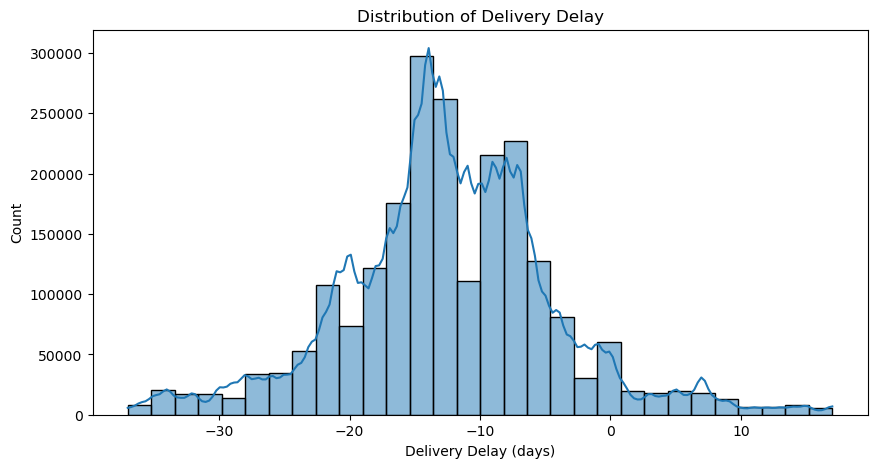

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed dataset
df = pd.read_csv("refined_data_with_features.csv")

# Plot the distribution of delivery delay
plt.figure(figsize=(10, 5))
sns.histplot(df["delivery_delay"].dropna(), bins=30, kde=True)
plt.title("Distribution of Delivery Delay")
plt.xlabel("Delivery Delay (days)")
plt.ylabel("Count")
plt.show()


In [76]:
from sklearn.model_selection import train_test_split

# Selecting features (excluding non-numeric and irrelevant columns)
features = [
    "customer_zip_code_prefix", "purchase_year", "purchase_month",
    "purchase_day", "purchase_hour", "estimated_delivery_time"
]

# Define X and y
X = df[features]
y = df["delivery_delay"]

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1763510, 6), (440878, 6), (1763510,), (440878,))

In [77]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_rf_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

# Print results
print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, R²: {r2_rf}")


Random Forest - MAE: 0.00047706366653032226, MSE: 0.003005580581537811, R²: 0.9999556217641971


In [78]:
import joblib
joblib.dump(rf_model, "timelytics_rf_model.pkl")


['timelytics_rf_model.pkl']